# Data Preprocess
We found that the original data set does not have a well-structured file name and some of photos need to be grayscale processed because of background and light condition

In [1]:
from PIL import Image
import os
import cv2 as cv
import json
import pandas as pd
import numpy as np
import sklearn.linear_model as lm

## Rename the file name

In [3]:
datadir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\train\\img"
jsdir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\train\\ann"
picsvdir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\train\\preprocessed"
path=os.path.join(datadir)
jsp=os.path.join(jsdir)
test_jslist=os.listdir(jsp)
test_list=os.listdir(path)

In [4]:
for i in test_jslist:
    try:
        with open(jsdir+"\\"+i,"r") as ison:
            idc=json.load(ison)
            name=i.split(".")[0]
            #print(idc["description"][:6],name)
            pname=name+".png"
        src=os.path.join(datadir,pname)
        dst=os.path.join(picsvdir,idc["description"]+".png")
        os.rename(src,dst)
    except:
        pass

KeyboardInterrupt: 

In [ ]:
datadir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\test\\img"
jsdir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\test\\ann"
picsvdir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\test\\preprocessed"
path=os.path.join(datadir)
jsp=os.path.join(jsdir)
test_jslist=os.listdir(jsp)
test_list=os.listdir(path)
for i in test_jslist:
    try:
        with open(jsdir+"\\"+i,"r") as ison:
            idc=json.load(ison)
            name=i.split(".")[0]
            #print(idc["description"][:6],name)
            pname=name+".png"
        src=os.path.join(datadir,pname)
        dst=os.path.join(picsvdir,idc["description"]+".png")
        os.rename(src,dst)
    except:
        pass

In [ ]:
datadir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\val\\img"
jsdir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\val\\ann"
picsvdir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\val\\preprocessed"
path=os.path.join(datadir)
jsp=os.path.join(jsdir)
test_jslist=os.listdir(jsp)
test_list=os.listdir(path)
for i in test_jslist:
    try:
        with open(jsdir+"\\"+i,"r") as ison:
            idc=json.load(ison)
            name=i.split(".")[0]
            #print(idc["description"][:6],name)
            pname=name+".png"
        src=os.path.join(datadir,pname)
        dst=os.path.join(picsvdir,idc["description"]+".png")
        os.rename(src,dst)
    except:
        pass

## Resize the image

### check the size of the image

In [3]:
name_list=[]
width_list=[]
height_list=[]
picsvdir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\train\\preprocessed"
for i in os.listdir(picsvdir):
    img=Image.open(picsvdir+"\\"+i)
    width,height=img.size
    width_list.append(width)
    height_list.append(height)
    name_list.append(i.split(".")[0])
info_df=pd.DataFrame({"name":name_list,"width":width_list,"height":height_list})

In [4]:
info_df.describe()

,width,height
count,47738.000000,47738.000000
mean,241.426327,52.120805
std,88.402524,19.195408
min,59.000000,13.000000
25%,170.000000,37.000000
50%,230.000000,50.000000
75%,301.000000,65.000000
max,882.000000,191.000000


<Axes: xlabel='height'>

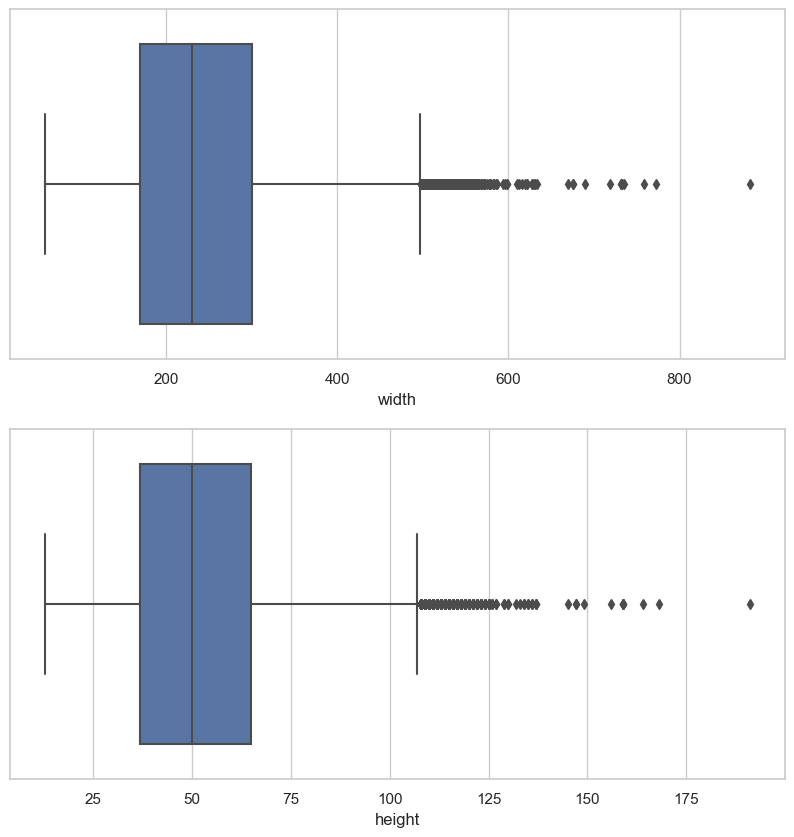

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
f,ax=plt.subplots(2,1,figsize=(10,10))
sns.boxplot(x="width",data=info_df,ax=ax[0])
sns.boxplot(x="height",data=info_df,ax=ax[1])

<Axes: xlabel='width', ylabel='height'>

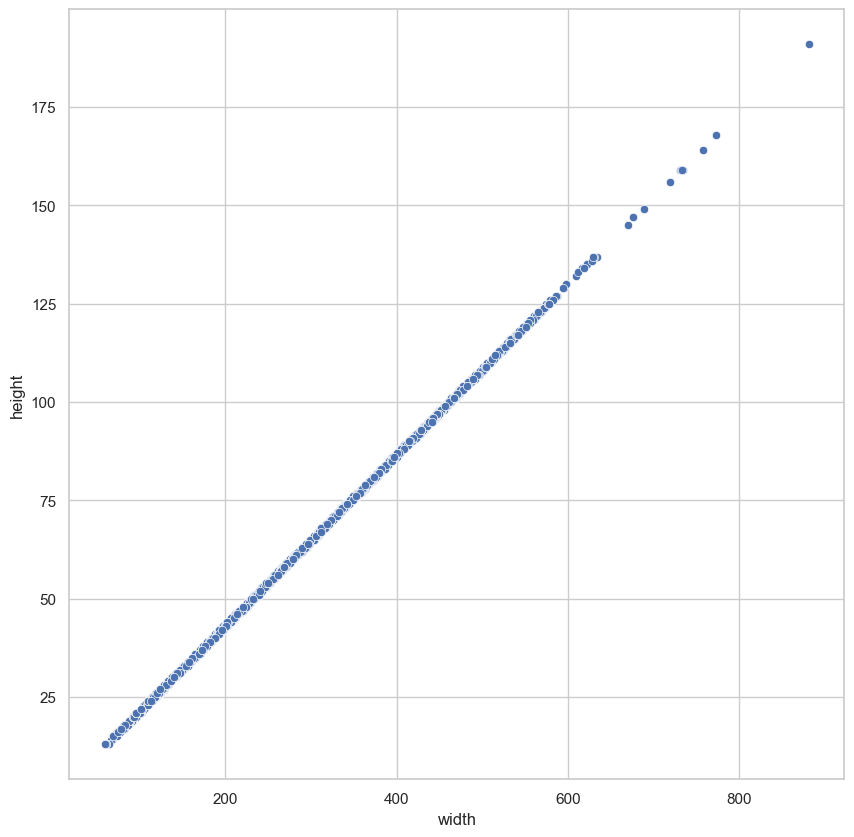

In [6]:
f=plt.figure(figsize=(10,10))
sns.scatterplot(x="width",y="height",data=info_df)

In [7]:
lr=lm.LinearRegression()
lr.fit(np.array(info_df["width"]).reshape(-1,1),np.array(info_df["height"]).reshape(-1,1))

LinearRegression()

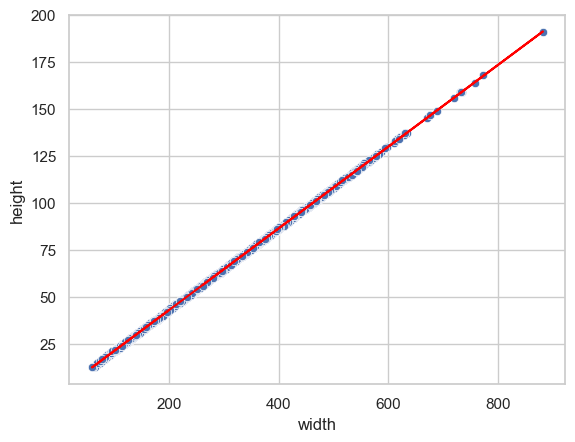

In [8]:
sns.scatterplot(x="width",y="height",data=info_df)
plt.plot(np.array(info_df["width"]),lr.predict(np.array(info_df["width"]).reshape(-1,1)),color="red")

In [9]:
print(lr.coef_,lr.intercept_)

[[0.21710872]] [-0.29495561]


In [14]:
print(230,lr.predict(np.array([[230]]))[0,0].round())
print(241,lr.predict(np.array([[241]]))[0,0].round())

230 50.0
241 52.0


In [16]:
picsvdir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\train\\preprocessed"
for i in os.listdir(picsvdir):
    img=Image.open(picsvdir+"\\"+i)
    width,height=img.size
    img=img.resize((230,50))
    img.save(picsvdir+"\\"+i)

In [3]:
picsvdir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\test\\preprocessed"
for i in os.listdir(picsvdir):
    img=Image.open(picsvdir+"\\"+i)
    width,height=img.size
    img=img.resize((230,50))
    img.save(picsvdir+"\\"+i)
picsvdir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\val\\preprocessed"
for i in os.listdir(picsvdir):
    img=Image.open(picsvdir+"\\"+i)
    width,height=img.size
    img=img.resize((230,50))
    img.save(picsvdir+"\\"+i)

## grayscale the image and remove the noise

In [5]:
def depoint(img):
    pixdata = img.load()
    w, h = img.size
    for y in range(1, h - 1):
        for x in range(1, w - 1):
            count = 0
            if pixdata[x, y - 1] > 245:
                count = count + 1
            if pixdata[x, y + 1] > 245:
                count = count + 1
            if pixdata[x - 1, y] > 245:
                count = count + 1
            if pixdata[x + 1, y] > 245:
                count = count + 1
            if pixdata[x - 1, y - 1] > 245:
                count = count + 1
            if pixdata[x - 1, y + 1] > 245:
                count = count + 1
            if pixdata[x + 1, y - 1] > 245:
                count = count + 1
            if pixdata[x + 1, y + 1] > 245:
                count = count + 1
            if count > 4:
                pixdata[x, y] = 255
    return img

In [4]:
picsvdir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\train\\preprocessed"
for i in os.listdir(picsvdir):
    img=Image.open(picsvdir+"\\"+i)
    img=img.convert("L")
    img=depoint(img)
    img.save(picsvdir+"\\"+i)

In [6]:
picsvdir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\test\\preprocessed"
for i in os.listdir(picsvdir):
    img=Image.open(picsvdir+"\\"+i)
    img=img.convert("L")
    img=depoint(img)
    img.save(picsvdir+"\\"+i)
picsvdir=".\data\\autoriaNumberplateOcrRu-2021-09-01\\val\\preprocessed"
for i in os.listdir(picsvdir):
    img=Image.open(picsvdir+"\\"+i)
    img=img.convert("L")
    img=depoint(img)
    img.save(picsvdir+"\\"+i)

## Check the type of letter in car number plate

In [2]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_theme(style="whitegrid")

In [3]:
path=".\data\\autoriaNumberplateOcrRu-2021-09-01\\train\\preprocessed"
name_list=[]
type_list=[]
letter_list=[]
for i in os.listdir(path):
    name=i.split(".")[0]
    name_list.append(name)
    ille=[]
    itype=[]
    for i in range(6):
        if name[i] in string.digits:
            itype.append("digit")
        else:
            itype.append("letter")
        ille.append(name[i])
    ille.append(name[6:])
    type_list.append(itype)
    letter_list.append(ille)
type_df=pd.DataFrame({"name":name_list,"type":type_list})

In [4]:
type_df

,name,type
0,A001AA01,"[letter, digit, digit, digit, letter, letter]"
1,A001AA199,"[letter, digit, digit, digit, letter, letter]"
2,A001AA36,"[letter, digit, digit, digit, letter, letter]"
3,A001AA50,"[letter, digit, digit, digit, letter, letter]"
4,A001AA54,"[letter, digit, digit, digit, letter, letter]"
...,...,...
47733,Y999TA38,"[letter, digit, digit, digit, letter, letter]"
47734,Y999TT98,"[letter, digit, digit, digit, letter, letter]"
47735,Y999XE177,"[letter, digit, digit, digit, letter, letter]"
47736,Y999XX199,"[letter, digit, digit, digit, letter, letter]"


In [5]:
type_df["type"].value_counts()

[letter, digit, digit, digit, letter, letter]    47738
Name: type, dtype: int64

So we are sure that each certain place in the car number plate is a letter or a digit in first 6 places.
And the last 2 or 3 places are digits.

In [6]:
letter_df=pd.DataFrame(letter_list,columns=["1","2","3","4","5","6","7"])
name_df=pd.DataFrame(name_list,columns=["name"])
final_df=pd.concat([name_df,letter_df],axis=1)
final_df

,name,1,2,3,4,5,6,7
0,A001AA01,A,0,0,1,A,A,01
1,A001AA199,A,0,0,1,A,A,199
2,A001AA36,A,0,0,1,A,A,36
3,A001AA50,A,0,0,1,A,A,50
4,A001AA54,A,0,0,1,A,A,54
...,...,...,...,...,...,...,...,...
47733,Y999TA38,Y,9,9,9,T,A,38
47734,Y999TT98,Y,9,9,9,T,T,98
47735,Y999XE177,Y,9,9,9,X,E,177
47736,Y999XX199,Y,9,9,9,X,X,199


In [7]:
final_df["1"].value_counts()

B    6555
A    6541
E    4590
K    4557
H    4417
O    4110
T    3618
C    3501
X    3358
Y    3085
P    2931
M     475
Name: 1, dtype: int64

In [8]:
final_df["2"].value_counts()

0    6762
1    4824
9    4744
7    4730
8    4615
5    4547
2    4479
3    4404
4    4393
6    4240
Name: 2, dtype: int64

In [9]:
final_df["3"].value_counts()

0    6805
7    4711
8    4703
9    4593
1    4582
2    4550
5    4531
3    4487
4    4444
6    4332
Name: 3, dtype: int64

In [10]:
final_df["4"].value_counts()

0    5586
7    5018
1    4929
8    4820
5    4714
9    4684
3    4652
2    4562
4    4477
6    4296
Name: 4, dtype: int64

In [11]:
final_df["5"].value_counts()

A    5433
K    4627
O    4573
E    4269
T    4247
B    4181
X    4159
P    4145
H    4066
C    3935
Y    3483
M     620
Name: 5, dtype: int64

In [12]:
final_df["6"].value_counts()

A    4788
O    4760
K    4403
X    4371
P    4297
B    4273
H    4252
T    4229
E    3967
C    3836
Y    3829
M     733
Name: 6, dtype: int64

In [13]:
final_df["7"].value_counts()

35     3954
777    1516
178    1404
799    1208
82     1157
       ... 
121       3
88        2
85        1
173       1
80        1
Name: 7, Length: 139, dtype: int64

In [14]:
csvout=".\data\\autoriaNumberplateOcrRu-2021-09-01\\train\\train.csv"
final_df.to_csv(csvout,index=False)